# Spectral clustering
for determining the successfulness of object feature representation in identifying various objects

In [160]:
import numpy as np
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

### Loading object features

In [161]:
### Object features
block_features = np.array([
    [0.025, 0.05, 0.05, 0., 0., 0., 0., 0., 0.],
    [0.03, 0.025, 0.045, 0., 0., 0., 0., 0., 0.],
    [0.05, 0.025, 0.04, 0., 0., 0., 0., 0., 0.],
])

bottle_features = np.array([
    [1.0, 0.6, 0.6, 309.36678819, 2821.1936563 ,  354.75590933,  913.89530908, 1272.62981163, 2693.03405172],
    [1.0, 0.8, 0.9, 409.36678819, 2521.1936563 ,  274.75590933,  1003.89530908, 1352.62981163, 3013.03405172],
    [0.9, 0.8, 1.0, 362.36678819, 2725.1936563 ,  406.75590933,  783.89530908, 982.62981163, 2533.03405172],
])

object_names = {0: 'bottle', 1: 'block'}

print(block_features.shape, bottle_features.shape)

(3, 9) (3, 9)


### Feature transformation

Concatenating features together

In [162]:
objects = (block_features, bottle_features)
features = np.concatenate(objects)
features

array([[2.50000000e-02, 5.00000000e-02, 5.00000000e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [3.00000000e-02, 2.50000000e-02, 4.50000000e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [5.00000000e-02, 2.50000000e-02, 4.00000000e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 6.00000000e-01, 6.00000000e-01, 3.09366788e+02,
        2.82119366e+03, 3.54755909e+02, 9.13895309e+02, 1.27262981e+03,
        2.69303405e+03],
       [1.00000000e+00, 8.00000000e-01, 9.00000000e-01, 4.09366788e+02,
        2.52119366e+03, 2.74755909e+02, 1.00389531e+03, 1.35262981e+03,
        3.01303405e+03],
       [9.00000000e-01, 8.00000000e-01, 1.00000000e+00, 3.62366788e+02,
        2.72519366e+03, 4.06755909e+02, 7.83895309e+02, 9.82629812e+02,
        2.5

Normalising the features by column

In [163]:
def normalize(arr):
    # Normalize & standardize each column
    mean = np.mean(arr, axis=0)
    std = np.std(arr, axis=0)
    arr = (arr - mean) / std
    arr[np.isnan(arr)] = 0
    arr[np.isinf(arr)] = 0
    return arr

features = normalize(features)

### Spectral clustering

In [164]:
n_clusters = 2
clustering = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', n_neighbors=3, assign_labels='kmeans', random_state=0).fit(features)
labels = clustering.labels_

d:\UCL_CS\Y3\COMP0029 Individual Project\Individual Project (90%)\UCL-FYP\venv\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


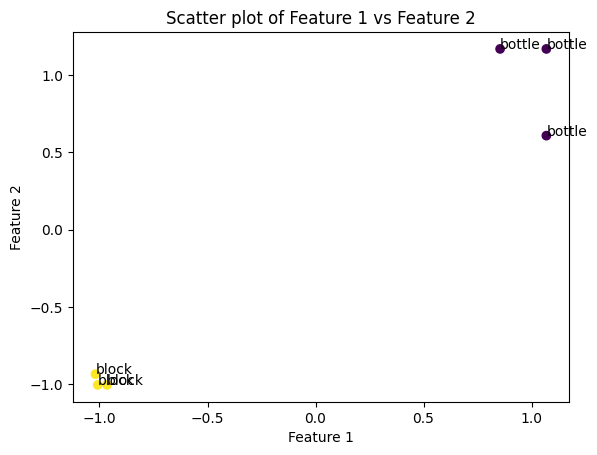

In [165]:
# Create a scatter plot of feature 1 against feature 2
fig, ax = plt.subplots()
scatter = ax.scatter(features[:, 0], features[:, 1], c=labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of Feature 1 vs Feature 2')

# Add labels for each point
for i, label in enumerate(labels):
    ax.annotate(str(object_names[label]), (features[i, 0], features[i, 1]))

plt.show()